<a href="https://colab.research.google.com/github/jibitesh2004/Appledore/blob/main/Aerospace%20Prognostics.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#IMPORT LIBRARIES

In [1]:
# Pandas library is used for handling tabular data
import pandas as pd

# NumPy is used for handling numerical series operations (addition, multiplication, and ...)

import numpy as np
# Sklearn library contains all the machine learning packages we need to digest and extract patterns from the data
from sklearn import linear_model, model_selection, metrics
from sklearn.model_selection import train_test_split

# Machine learning libraries used to build a decision tree
from sklearn.tree import DecisionTreeClassifier
from sklearn import tree

# Sklearn's preprocessing library is used for processing and cleaning the data
from sklearn import preprocessing

# for visualizing the tree
import pydotplus
from IPython.display import Image

#READ DATA INTO A VARIABLE

In [2]:
launch_data = pd.read_excel('Generated.xlsx')
launch_data.head()

,Name,Date,Time (East Coast),Location,Crewed or Uncrewed,Launched?,High Temp,Low Temp,Ave Temp,Temp at Launch Time,...,Max Wind Speed,Visibility,Wind Speed at Launch Time,Hist Ave Max Wind Speed,Hist Ave Visibility,Sea Level Pressure,Hist Ave Sea Level Pressure,Day Length,Condition,Notes
0,NaN,1958-12-04,NaN,Cape Canaveral,NaN,NaN,75,68,71.00,NaN,...,16,15,NaN,NaN,NaN,30.22,NaN,10:26:00,Cloudy,NaN
1,NaN,1958-12-05,NaN,Cape Canaveral,NaN,NaN,78,70,73.39,NaN,...,14,10,NaN,NaN,NaN,30.20,NaN,10:26:00,Cloudy,NaN
2,Pioneer 3,1958-12-06,01:45:00,Cape Canaveral,Uncrewed,Y,73,0,60.21,62.0,...,15,10,11.0,NaN,NaN,30.25,NaN,10:25:00,Cloudy,NaN
3,NaN,1958-12-07,NaN,Cape Canaveral,NaN,NaN,76,57,66.04,NaN,...,10,10,NaN,NaN,NaN,30.28,NaN,10:25:00,Partly Cloudy,NaN
4,NaN,1958-12-08,NaN,Cape Canaveral,NaN,NaN,79,60,70.52,NaN,...,12,10,NaN,NaN,NaN,30.23,NaN,12:24:00,Partly Cloudy,NaN


#EXPLORE DATA

In [3]:
launch_data.columns

Index(['Name', 'Date', 'Time (East Coast)', 'Location', 'Crewed or Uncrewed',
       'Launched?', 'High Temp', 'Low Temp', 'Ave Temp', 'Temp at Launch Time',
       'Hist High Temp', 'Hist Low Temp', 'Hist Ave Temp',
       'Percipitation at Launch Time', 'Hist Ave Percipitation',
       'Wind Direction', 'Max Wind Speed', 'Visibility',
       'Wind Speed at Launch Time', 'Hist Ave Max Wind Speed',
       'Hist Ave Visibility', 'Sea Level Pressure',
       'Hist Ave Sea Level Pressure', 'Day Length', 'Condition', 'Notes'],
      dtype='object')

#DATA CLEANING

In [4]:
launch_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5 entries, 0 to 4
Data columns (total 26 columns):
 #   Column                        Non-Null Count  Dtype         
---  ------                        --------------  -----         
 0   Name                          1 non-null      object        
 1   Date                          5 non-null      datetime64[ns]
 2   Time (East Coast)             1 non-null      object        
 3   Location                      5 non-null      object        
 4   Crewed or Uncrewed            1 non-null      object        
 5   Launched?                     1 non-null      object        
 6   High Temp                     5 non-null      int64         
 7   Low Temp                      5 non-null      int64         
 8   Ave Temp                      5 non-null      float64       
 9   Temp at Launch Time           1 non-null      float64       
 10  Hist High Temp                5 non-null      int64         
 11  Hist Low Temp                 5 non-

In [6]:
## To handle missing values, we will fill the missing values with appropriate values
launch_data['Launched?'].fillna('N',inplace=True)
launch_data['Crewed or Uncrewed'].fillna('Uncrewed',inplace=True)
launch_data['Wind Direction'].fillna('unknown',inplace=True)
launch_data['Condition'].fillna('Fair',inplace=True)
launch_data.fillna(0,inplace=True)
launch_data.head()

<ipython-input-6-b569647558e1>:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  launch_data['Launched?'].fillna('N',inplace=True)
<ipython-input-6-b569647558e1>:3: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using

,Name,Date,Time (East Coast),Location,Crewed or Uncrewed,Launched?,High Temp,Low Temp,Ave Temp,Temp at Launch Time,...,Max Wind Speed,Visibility,Wind Speed at Launch Time,Hist Ave Max Wind Speed,Hist Ave Visibility,Sea Level Pressure,Hist Ave Sea Level Pressure,Day Length,Condition,Notes
0,0,1958-12-04,0,Cape Canaveral,Uncrewed,N,75,68,71.00,0.0,...,16,15,0.0,0.0,0.0,30.22,0.0,10:26:00,Cloudy,0.0
1,0,1958-12-05,0,Cape Canaveral,Uncrewed,N,78,70,73.39,0.0,...,14,10,0.0,0.0,0.0,30.20,0.0,10:26:00,Cloudy,0.0
2,Pioneer 3,1958-12-06,01:45:00,Cape Canaveral,Uncrewed,Y,73,0,60.21,62.0,...,15,10,11.0,0.0,0.0,30.25,0.0,10:25:00,Cloudy,0.0
3,0,1958-12-07,0,Cape Canaveral,Uncrewed,N,76,57,66.04,0.0,...,10,10,0.0,0.0,0.0,30.28,0.0,10:25:00,Partly Cloudy,0.0
4,0,1958-12-08,0,Cape Canaveral,Uncrewed,N,79,60,70.52,0.0,...,12,10,0.0,0.0,0.0,30.23,0.0,12:24:00,Partly Cloudy,0.0


#SEE CHANGES MADE TO THE DATA

In [7]:
launch_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5 entries, 0 to 4
Data columns (total 26 columns):
 #   Column                        Non-Null Count  Dtype         
---  ------                        --------------  -----         
 0   Name                          5 non-null      object        
 1   Date                          5 non-null      datetime64[ns]
 2   Time (East Coast)             5 non-null      object        
 3   Location                      5 non-null      object        
 4   Crewed or Uncrewed            5 non-null      object        
 5   Launched?                     5 non-null      object        
 6   High Temp                     5 non-null      int64         
 7   Low Temp                      5 non-null      int64         
 8   Ave Temp                      5 non-null      float64       
 9   Temp at Launch Time           5 non-null      float64       
 10  Hist High Temp                5 non-null      int64         
 11  Hist Low Temp                 5 non-

#DATA MANIPULATION

In [8]:
## As part of the data cleaning process, we have to convert text data to numerical because computers understand only numbers
label_encoder = preprocessing.LabelEncoder()

# Three columns have categorical text info, and we convert them to numbers
launch_data['Crewed or Uncrewed'] = label_encoder.fit_transform(launch_data['Crewed or Uncrewed'])
launch_data['Wind Direction'] = label_encoder.fit_transform(launch_data['Wind Direction'])
launch_data['Condition'] = label_encoder.fit_transform(launch_data['Condition'])

In [9]:
launch_data.head()

,Name,Date,Time (East Coast),Location,Crewed or Uncrewed,Launched?,High Temp,Low Temp,Ave Temp,Temp at Launch Time,...,Max Wind Speed,Visibility,Wind Speed at Launch Time,Hist Ave Max Wind Speed,Hist Ave Visibility,Sea Level Pressure,Hist Ave Sea Level Pressure,Day Length,Condition,Notes
0,0,1958-12-04,0,Cape Canaveral,0,N,75,68,71.00,0.0,...,16,15,0.0,0.0,0.0,30.22,0.0,10:26:00,0,0.0
1,0,1958-12-05,0,Cape Canaveral,0,N,78,70,73.39,0.0,...,14,10,0.0,0.0,0.0,30.20,0.0,10:26:00,0,0.0
2,Pioneer 3,1958-12-06,01:45:00,Cape Canaveral,0,Y,73,0,60.21,62.0,...,15,10,11.0,0.0,0.0,30.25,0.0,10:25:00,0,0.0
3,0,1958-12-07,0,Cape Canaveral,0,N,76,57,66.04,0.0,...,10,10,0.0,0.0,0.0,30.28,0.0,10:25:00,1,0.0
4,0,1958-12-08,0,Cape Canaveral,0,N,79,60,70.52,0.0,...,12,10,0.0,0.0,0.0,30.23,0.0,12:24:00,1,0.0


#FURTHER CLEANING

In [10]:
# First, we save the output we are interested in. In this case, "launch" yes and no's go into the output variable.
y = launch_data['Launched?']

# Removing the columns we are not interested in
launch_data.drop(['Name','Date','Time (East Coast)','Location','Launched?','Hist Ave Sea Level Pressure','Sea Level Pressure','Day Length','Notes','Hist Ave Visibility', 'Hist Ave Max Wind Speed'],axis=1, inplace=True)

# Saving the rest of the data as input data
X = launch_data

In [11]:
# List of variables that our machine learning algorithm is going to look at:
X.columns

Index(['Crewed or Uncrewed', 'High Temp', 'Low Temp', 'Ave Temp',
       'Temp at Launch Time', 'Hist High Temp', 'Hist Low Temp',
       'Hist Ave Temp', 'Percipitation at Launch Time',
       'Hist Ave Percipitation', 'Wind Direction', 'Max Wind Speed',
       'Visibility', 'Wind Speed at Launch Time', 'Condition'],
      dtype='object')

Can you predict whether a launch is likely to happen given specific weather conditions?

#CREATE A MACHINE LEARNING MODEL

In [12]:
# Create decision tree classifier
tree_model = DecisionTreeClassifier(random_state=0,max_depth=5)

#SPLIT DATA INTO TRAIN AND TEST DATA

In [14]:
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=0.2, random_state=99)

#FIT THE MODEL

In [15]:
# Fitting the model to the training data
tree_model.fit(X_train,y_train)

DecisionTreeClassifier(max_depth=5, random_state=0)

#TEST THE MODEL

In [16]:
# Do prediction on test Data
y_pred = tree_model.predict(X_test)
print(y_pred)

['N']


#SCORE THE MODEL

In [17]:
# Calculate accuracy
tree_model.score(X_test,y_test)

0.0

#VISUALISE THE MODEL

In [18]:
# Let's import a library for visualizing our decision tree.
from sklearn.tree import export_graphviz

def tree_graph_to_png(tree, feature_names,class_names, png_file_to_save):
    tree_str = export_graphviz(tree, feature_names=feature_names, class_names=class_names,
                                     filled=True, out_file=None)
    graph = pydotplus.graph_from_dot_data(tree_str)
    return Image(graph.create_png())

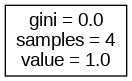

In [19]:
# This function takes a machine learning model and visualizes it.
tree_graph_to_png(tree=tree_model, feature_names=X.columns.values,class_names=['No Launch','Launch'], png_file_to_save='decision-tree.png')

In [20]:
launch_data[(launch_data['Wind Speed at Launch Time'] > 1) & (launch_data['Max Wind Speed'] > 30.5)]

,Crewed or Uncrewed,High Temp,Low Temp,Ave Temp,Temp at Launch Time,Hist High Temp,Hist Low Temp,Hist Ave Temp,Percipitation at Launch Time,Hist Ave Percipitation,Wind Direction,Max Wind Speed,Visibility,Wind Speed at Launch Time,Condition


#TEST THE MODEL

In [21]:
# ['Crewed or Uncrewed', 'High Temp', 'Low Temp', 'Ave Temp',
#        'Temp at Launch Time', 'Hist High Temp', 'Hist Low Temp',
#        'Hist Ave Temp', 'Precipitation at Launch Time',
#        'Hist Ave Precipitation', 'Wind Direction', 'Max Wind Speed',
#        'Visibility', 'Wind Speed at Launch Time', 'Hist Ave Max Wind Speed',
#        'Hist Ave Visibility', 'Condition']

data_input = [ 1.  , 75.  , 68.  , 71.  ,  0.  , 75.  , 55.  , 65.  ,  0.  , 0.08,  0.  , 16.  , 15.  ,  0.  ,  0. ]

tree_model.predict([data_input])

/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but DecisionTreeClassifier was fitted with feature names
  warnings.warn(


array(['N'], dtype=object)